Fontes de código: TP7 MINDD, TP1 MINDD Rita e Samuel 23/24, documentação tensorflow

# Trabalho 2

## 4.2.1 Redes Neuronais

Neste notebook está o código relacionado com as Redes Neuronais na sua utilização para classificação.

### Imports

In [1]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np  
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras, random
from keras_visualizer import visualizer
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix 
from sklearn.model_selection import KFold
import utilidades as ut

### Inicializações e variáveis

In [2]:
warnings.filterwarnings("ignore")  # Desabilitar warnings.
# Garantir que se utiliza um estilo definido centralmente e comum a todos os gráficos.
# plt.style.use("style/estilo.mplstyle")
plt.style.use('ggplot')

%matplotlib inline

label_encoder = LabelEncoder()

ficheiro = "dados_preparados.csv"
colunas_numericas = ["Idade", "FCV", "NRP", "CA", "FAF", "TUDE", "IMC"]
colunas_classes = ["Genero", "Historico_obesidade_familiar", "FCCAC", "Fumador", "MCC", "CCER", "CBA", "TRANS", "Label"]
colunas_classes_binarias = ['Genero', 'Historico_obesidade_familiar', 'FCCAC', 'Fumador', 'MCC']
colunas_classes_multiplos = ["CCER", "CBA", "TRANS", "Label"]

## Leitura dos dados preparados

In [3]:
dados_trabalho = pd.read_csv(ficheiro)

In [4]:
dados_trabalho

,Genero,Idade,Historico_obesidade_familiar,FCCAC,FCV,NRP,CCER,Fumador,CA,MCC,FAF,TUDE,CBA,TRANS,Label,IMC
0,Feminino,21.000000,Sim,Nao,2.0,3.0,Ocasionalmente,Nao,2.000000,Nao,0.000000,1.000000,Nao,Transportes_Publicos,Peso_Normal,24.386526
1,Feminino,21.000000,Sim,Nao,3.0,3.0,Ocasionalmente,Sim,3.000000,Sim,3.000000,0.000000,Ocasionalmente,Transportes_Publicos,Peso_Normal,24.238227
2,Masculino,23.000000,Sim,Nao,2.0,3.0,Ocasionalmente,Nao,2.000000,Nao,2.000000,1.000000,Frequentemente,Transportes_Publicos,Peso_Normal,23.765432
3,Masculino,27.000000,Nao,Nao,3.0,3.0,Ocasionalmente,Nao,2.000000,Nao,2.000000,0.000000,Frequentemente,Caminhada,Excesso_Peso_Grau_I,26.851852
4,Masculino,22.000000,Nao,Nao,2.0,1.0,Ocasionalmente,Nao,2.000000,Nao,0.000000,0.000000,Ocasionalmente,Transportes_Publicos,Excesso_Peso_Grau_II,28.342381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Feminino,20.976842,Sim,Sim,3.0,3.0,Ocasionalmente,Nao,1.728139,Nao,1.676269,0.906247,Ocasionalmente,Transportes_Publicos,Obesidade_Mórbida,44.901475
2107,Feminino,21.982942,Sim,Sim,3.0,3.0,Ocasionalmente,Nao,2.005130,Nao,1.341390,0.599270,Ocasionalmente,Transportes_Publicos,Obesidade_Mórbida,43.741923
2108,Feminino,22.524036,Sim,Sim,3.0,3.0,Ocasionalmente,Nao,2.054193,Nao,1.414209,0.646288,Ocasionalmente,Transportes_Publicos,Obesidade_Mórbida,43.543817
2109,Feminino,24.361936,Sim,Sim,3.0,3.0,Ocasionalmente,Nao,2.852339,Nao,1.139107,0.586035,Ocasionalmente,Transportes_Publicos,Obesidade_Mórbida,44.071535


Temos no entanto de realizar primeiro o encoding das classes para valores numéricos, esta operação é realizada usando o ``sklearn.preprocessing.LabelEncoder`` em todas as colunas com apenas 2 classes.

In [5]:
ut.titulo("Valores codificados por atributo")

# for coluna in colunas_classes_binarias:
for coluna in colunas_classes:
    if dados_trabalho[coluna].dtype == 'object':
        dados_trabalho[coluna] = label_encoder.fit_transform(dados_trabalho[coluna].values)
        ut.etiqueta_e_valor(coluna, str(sorted(dados_trabalho[coluna].unique())))

Valores codificados por atributo
Genero: [0, 1]
Historico_obesidade_familiar: [0, 1]
FCCAC: [0, 1]
Fumador: [0, 1]
MCC: [0, 1]
CCER: [0, 1, 2, 3]
CBA: [0, 1, 2, 3]
TRANS: [0, 1, 2, 3, 4]
Label: [0, 1, 2, 3, 4, 5, 6, 7, 8]


?? Para colunas que têm mais que 2 classes precisamos de utilizar o ``pandas.get_dummies()``.

In [6]:
# dados_trabalho = pd.get_dummies(dados_trabalho, dtype=float)

In [7]:
dados_trabalho

,Genero,Idade,Historico_obesidade_familiar,FCCAC,FCV,NRP,CCER,Fumador,CA,MCC,FAF,TUDE,CBA,TRANS,Label,IMC
0,0,21.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,1,4,8,24.386526
1,0,21.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,4,8,24.238227
2,1,23.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,0,4,8,23.765432
3,1,27.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,0,2,0,26.851852
4,1,22.000000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,4,1,28.342381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,4,6,44.901475
2107,0,21.982942,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,4,6,43.741923
2108,0,22.524036,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,4,6,43.543817
2109,0,24.361936,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,4,6,44.071535


## Holdout

divide o dataset em target(y) e feature(x)

In [8]:
y = dados_trabalho.loc[:, "Label"].values
X = dados_trabalho.drop(["Label"], axis=1).values

### Codificação

Utilizar o ``sklearn.preprocessing.labelEncoder()`` no y

In [9]:
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

### Divisão dos dados em treino e teste

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
X_train.shape, X_test.shape

((1477, 15), (634, 15))

## Redes neuronais

### Parametrização

Estes valores podem ser ajustados, com base nos gráficos de overfitting.

In [11]:
random.set_seed(3)
nr_colunas = 15

### Pré processamento dos dados

In [12]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
X_train.shape, X_test.shape

((1477, 15), (634, 15))

### Modelo 

Escolhi usar softmax em vez de sigmoid porque temos várias classes (9) na coluna de target.


In [14]:
#model = keras.Sequential([
#    keras.Input(shape=(nr_colunas,)),
#    keras.layers.Dense(3, activation="relu"),
#    keras.layers.Dense(3, activation="relu"),

#    keras.layers.Dense(9, activation="softmax"),
#])

model = keras.Sequential([
    keras.Input(shape=(nr_colunas,)),
    keras.layers.Dense(64, activation="relu", kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    keras.layers.Dense(32, activation="relu", kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    keras.layers.Dense(9, activation="softmax"),
])

### Treino do modelo

In [15]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

## Resumo do modelo

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 9)              │           297 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,401 (13.29 KB)

 Trainable params: 3,401 (13.29 KB)

 Non-trainable params: 0 (0.00 B)

### VIsualizer

In [17]:
visualizer(
    model,
    #file_format='jpeg',
    view=True,
    settings=None
)

### Histórico

In [18]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=30)

Epoch 1/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.1351 - loss: 3.0291 - val_accuracy: 0.3581 - val_loss: 2.5820
Epoch 2/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2216 - loss: 2.6689 - val_accuracy: 0.4122 - val_loss: 2.3830
Epoch 3/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2887 - loss: 2.4773 - val_accuracy: 0.4662 - val_loss: 2.1948
Epoch 4/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3154 - loss: 2.3306 - val_accuracy: 0.5068 - val_loss: 2.0459
Epoch 5/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3684 - loss: 2.1372 - val_accuracy: 0.5338 - val_loss: 1.8914
Epoch 6/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3722 - loss: 2.0780 - val_accuracy: 0.5676 - val_loss: 1.7754
Epoch 7/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3880 - loss: 1.9512 - val_accuracy: 0.6149 - val_loss: 1.6799
Epoch 8/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4284 - loss: 1.8650 - val_accuracy: 0.6419 - val_loss

### Previsões

In [19]:
#NOTA: os valores podem mudar muito ligeiramente sempre que executado e podem estar diferentes dos do artigo
#mas a classe prevista é sempre a mesma
Nhidden=(64,32)
nn = MLPRegressor(hidden_layer_sizes=Nhidden,
                                          activation='tanh',
                                          solver='lbfgs', max_iter=1000, learning_rate_init=0.001)
nn.fit(X_train, y_train)
# Make prediction
pred = nn.predict(X_test)
#
# Calculate accuracy and error metrics
#
test_set_rsquared = nn.score(X_test, y_test)
test_set_rmse = np.sqrt(mean_squared_error(y_test, pred))
#
# Print R_squared and RMSE value
#
print('R_squared value: ', test_set_rsquared)
print('RMSE: ', test_set_rmse)

R_squared value:  0.22924394056125685
RMSE:  2.464387223832352


### Avaliações ao modelo

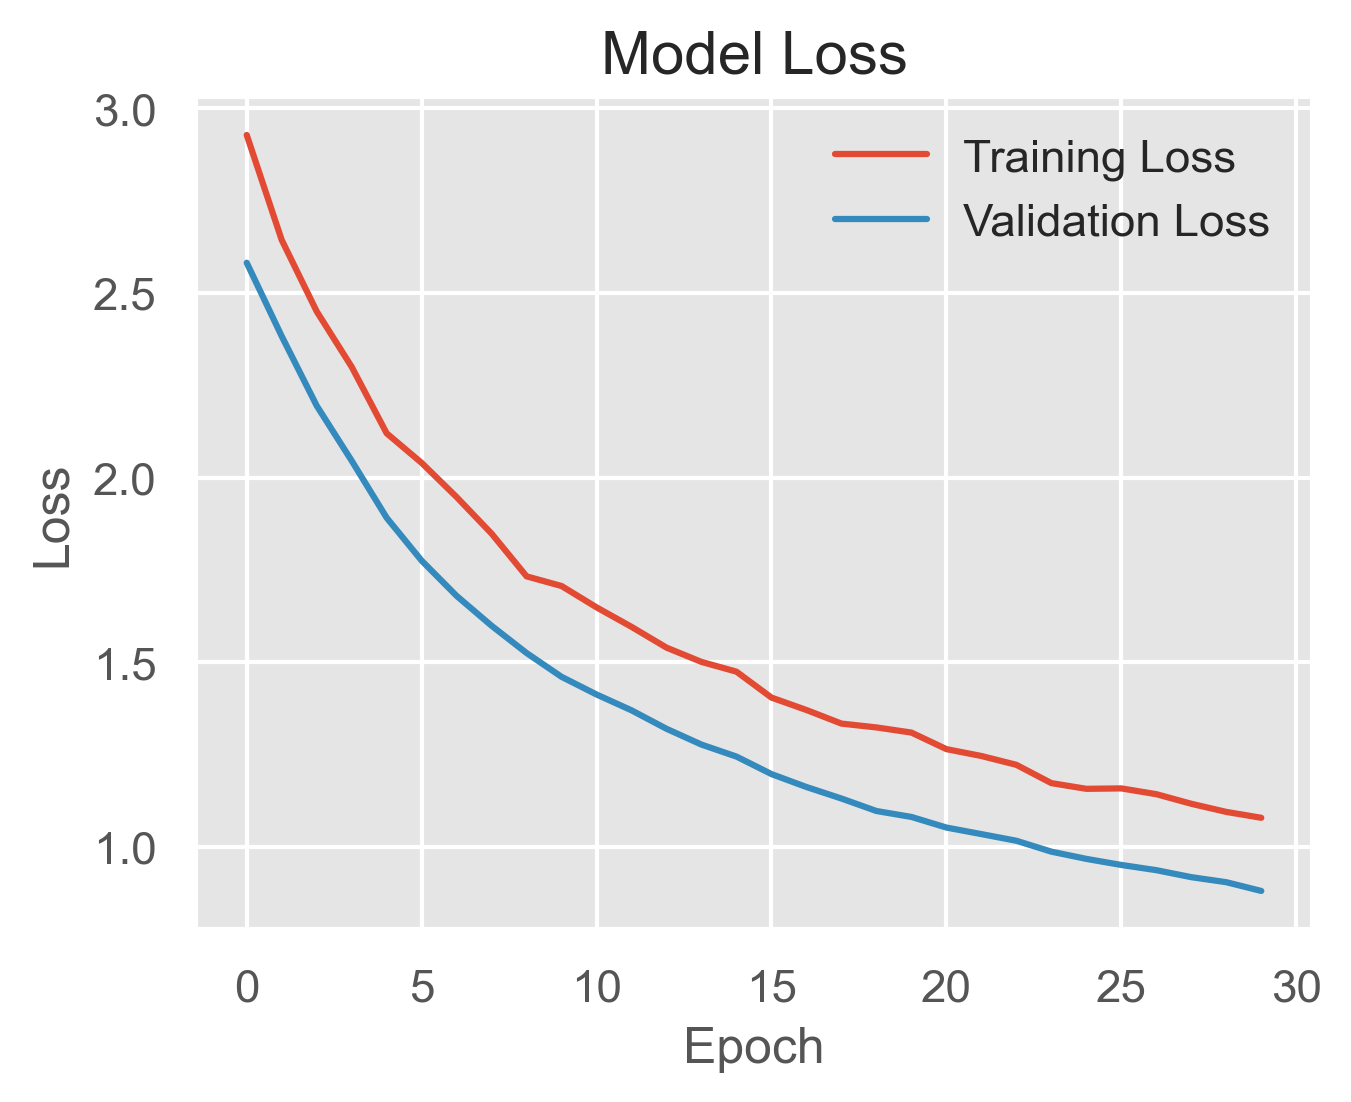

In [20]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(loc="upper right")
plt.show()


#### Model Accuracy

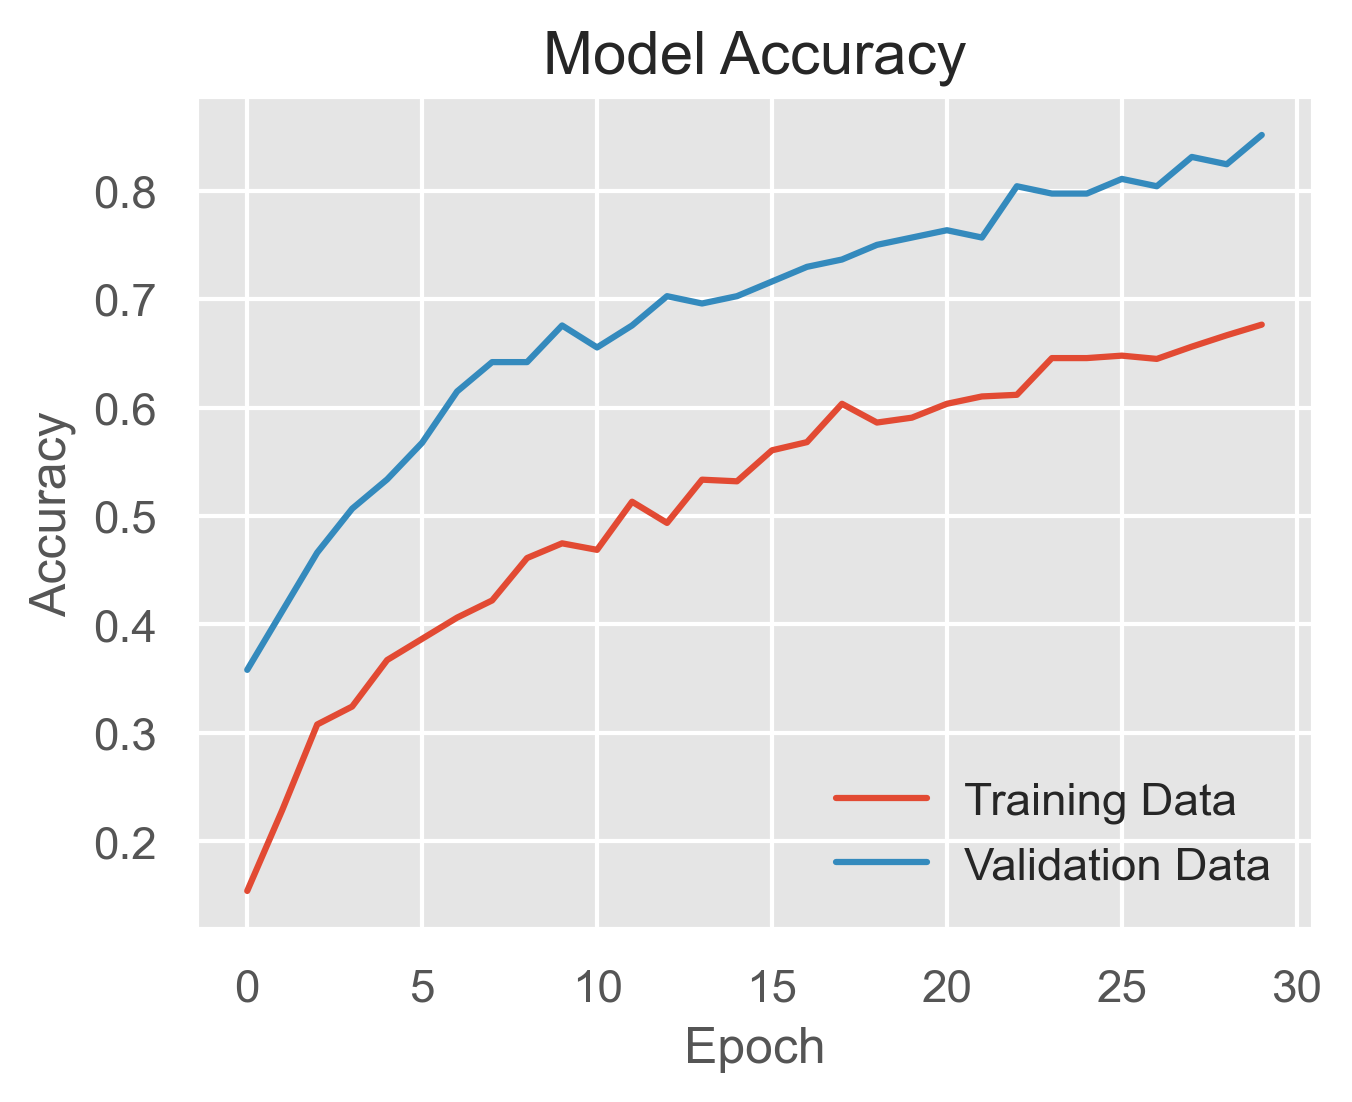

In [21]:
plt.plot(history.history["accuracy"], label="Training Data")
#adicionei esta linha debaixo
plt.plot(history.history["val_accuracy"], label="Validation Data")
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(loc="lower right")
plt.show()

In [22]:
#NOTA: os valores podem mudar muito ligeiramente sempre que executado e podem estar diferentes dos do artigo
import numpy as np
y_pred = np.argmax(model.predict(X_test), axis=1)

# Calculando a acurÃ¡cia
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Calculando a sensibilidade (recall)
sensitivity = recall_score(y_test, y_pred, average='macro')
#print(f'Sensitivity (Recall): {sensitivity:.4f}')

# Calculando a especificidade
# A especificidade Ã© um pouco mais complexa, vamos calcular manualmente usando a matriz de confusÃ£o
cm = confusion_matrix(y_test, y_pred)
specificity = []
for i in range(len(cm)):
    tn = cm.sum() - (cm[i, :].sum() + cm[:, i].sum() - cm[i, i])
    fp = cm[:, i].sum() - cm[i, i]
    specificity.append(tn / (tn + fp))
specificity = np.mean(specificity)
#print(f'Specificity: {specificity:.4f}')

# Calculando o F1-Score
f1 = f1_score(y_test, y_pred, average='macro')
#print(f'F1-Score: {f1:.4f}')

# RelatÃ³rio detalhado de classificaÃ§Ã£o
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy: 0.8060

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.95      0.81        85
           1       0.96      0.66      0.78        74
           2       0.58      0.86      0.69        59
           3       0.00      0.00      0.00        21
           4       0.00      0.00      0.00         4
           5       0.96      0.86      0.90       111
           6       0.83      1.00      0.91        87
           7       0.87      0.82      0.84       105
           8       0.79      0.70      0.75        88

    accuracy                           0.81       634
   macro avg       0.63      0.65      0.63       634
weighted avg       0.80      0.81      0.79       634



### Avaliação k-fold

In [23]:
def kfold_indices(data, k):
    fold_size = len(data) // k
    indices = np.arange(len(data))
    folds = []
    for i in range(k):
        test_indices = indices[i * fold_size: (i + 1) * fold_size]
        train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])
        folds.append((train_indices, test_indices))
    return folds
# Define the number of folds (K)
k = 5
# Get the fold indices
fold_indices = kfold_indices(X, k)

In [ ]:
scores = []
prevs_folds = []
y_folds = []

scores = []
prevs_folds = []
y_folds = []

# Iterate through each fold
for train_indices, test_indices in fold_indices:
    X_train, y_train = X[train_indices], y[train_indices]
    X_test, y_test = X[test_indices], y[test_indices]

    # Define the model
    model = keras.Sequential([
        keras.Input(shape=(X_train.shape[1],)),
        Dense(64, activation="relu", kernel_regularizer=l2(0.01)),
        Dropout(0.5),
        Dense(32, activation="relu", kernel_regularizer=l2(0.01)),
        Dropout(0.5),
        Dense(9, activation="softmax"),
    ])
    
    # Compile the model
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    # Train the model
    model.fit(X_train, y_train, validation_split=0.1, epochs=30, verbose=0)
    
    # Make predictions on the test data
    #usou-se o argmax como o predict já não funcionaria para a rede neuronal. O argmax é ideal quando se trata de problema de classificação!!!!!!!!!!!!!!!!!
    
    y_pred = np.argmax(model.predict(X_test), axis=1)

    # Calculate the accuracy score for this fold
    fold_score = accuracy_score(y_test, y_pred)

    # Append the fold score to the list of scores
    scores.append(fold_score)

    # Append the prevs and labels of the test set
    prevs_folds.append(y_pred)
    y_folds.append(y_test)

# Calculate the mean accuracy across all folds
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)

print("K-Fold Cross-Validation Scores:", scores)
print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation:", std_accuracy)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
